## Run example for "add_noise_to_program"

In [1]:
from pyquil.quil import Program
from pyquil.gates import MEASURE, H, Z, CZ
from pyquil.api import get_qc
from pyquil.quilbase import Declare
from new_noise import add_noise_to_program

In [2]:
qc = get_qc('Aspen-M-3-qvm')
p = Program()
p += H(0)
p += H(1)
p += Z(2)
p += CZ(0,2)
p += Declare("ro", "BIT", 2)
p += MEASURE(0, ("ro", 0))
p += MEASURE(2, ("ro", 1))
p.wrap_in_numshots_loop(500)
print(p)

H 0
H 1
Z 2
CZ 0 2
DECLARE ro BIT[2]
MEASURE 0 ro[0]
MEASURE 2 ro[1]



### basic call

In [3]:
# basic call:
noisy_1 = add_noise_to_program(qc=qc, p=p)
print(noisy_1)

DEFGATE Noisy_I_2Q_gate:
    1.0, 0
    0, 1.0

DECLARE ro BIT[2]
RZ(-0.9199372448290238) 20
RX(pi/2) 20
RZ(pi) 20
RX(-pi/2) 20
RZ(-0.9199372448290238) 20
RZ(3*pi/2) 123
XY(pi) 123 20
Noisy_I_2Q_gate 123
Noisy_I_2Q_gate 20
Noisy_I_2Q_gate 141
RZ(-3*pi/2) 123
RX(pi/2) 123
RZ(3*pi/2) 123
XY(pi) 123 20
Noisy_I_2Q_gate 123
Noisy_I_2Q_gate 20
Noisy_I_2Q_gate 141
MEASURE 123 ro[1]
RZ(-3*pi/2) 20
RX(pi/2) 20
RZ(pi) 20
MEASURE 20 ro[0]
RZ(pi/2) 141
RX(pi/2) 141
RZ(pi/2) 141
HALT
PRAGMA ADD-KRAUS Noisy_I_2Q_gate 123 "(0.9998427779440949 0.0 0.0 0.997722054211172)"
PRAGMA ADD-KRAUS Noisy_I_2Q_gate 123 "(0.01773187505695144 0.0 0.0 -0.01769426473551688)"
PRAGMA ADD-KRAUS Noisy_I_2Q_gate 123 "(0.0 0.06508673557341699 0.0 0.0)"
PRAGMA ADD-KRAUS Noisy_I_2Q_gate 123 "(0.0 -0.001154291343110744 0.0 0.0)"
PRAGMA ADD-KRAUS Noisy_I_2Q_gate 141 "(0.9984038049412218 0.0 0.0 0.9961269682995442)"
PRAGMA ADD-KRAUS Noisy_I_2Q_gate 141 "(0.056478688714334424 0.0 0.0 -0.056349890379129484)"
PRAGMA ADD-KRAUS Nois

In [4]:
bitstrings = qc.run(noisy_1).readout_data.get("ro")
print(bitstrings)

[[1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]

### Call with options:

In [5]:
from new_noise import NoiseTypes
from Calibrations import Calibrations

In [6]:
# with options:
calib = Calibrations(qc)
noise_types = NoiseTypes(decoherence_1q=True, decoherence_2q=True)
noisy_2 = add_noise_to_program(
    qc = qc,
    p = p,
    convert_to_native = True,
    calibrations=Calibrations(qc),
    noise_types=noise_types
)
print(noisy_2)

DEFGATE Noisy_I_2Q_gate:
    1.0, 0
    0, 1.0

DEFGATE Noisy_I_1Q_gate:
    1.0, 0
    0, 1.0

DECLARE ro BIT[2]
RZ(-0.9199372448290238) 20
Noisy_I_1Q_gate 123
Noisy_I_1Q_gate 20
Noisy_I_1Q_gate 141
RX(pi/2) 20
Noisy_I_1Q_gate 123
Noisy_I_1Q_gate 20
Noisy_I_1Q_gate 141
RZ(pi) 20
Noisy_I_1Q_gate 123
Noisy_I_1Q_gate 20
Noisy_I_1Q_gate 141
RX(-pi/2) 20
Noisy_I_1Q_gate 123
Noisy_I_1Q_gate 20
Noisy_I_1Q_gate 141
RZ(-0.9199372448290238) 20
Noisy_I_1Q_gate 123
Noisy_I_1Q_gate 20
Noisy_I_1Q_gate 141
RZ(3*pi/2) 123
Noisy_I_1Q_gate 123
Noisy_I_1Q_gate 20
Noisy_I_1Q_gate 141
XY(pi) 123 20
Noisy_I_2Q_gate 123
Noisy_I_2Q_gate 20
Noisy_I_2Q_gate 141
RZ(-3*pi/2) 123
Noisy_I_1Q_gate 123
Noisy_I_1Q_gate 20
Noisy_I_1Q_gate 141
RX(pi/2) 123
Noisy_I_1Q_gate 123
Noisy_I_1Q_gate 20
Noisy_I_1Q_gate 141
RZ(3*pi/2) 123
Noisy_I_1Q_gate 123
Noisy_I_1Q_gate 20
Noisy_I_1Q_gate 141
XY(pi) 123 20
Noisy_I_2Q_gate 123
Noisy_I_2Q_gate 20
Noisy_I_2Q_gate 141
MEASURE 123 ro[1]
RZ(-3*pi/2) 20
Noisy_I_1Q_gate 123
Noisy_I_

In [7]:
bitstrings = qc.run(noisy_2).readout_data.get("ro")
print(bitstrings)

[[0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]

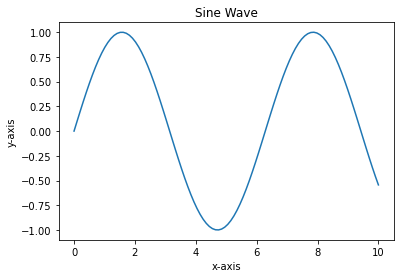

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create some sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a plot
plt.plot(x, y)

# Add labels and a title
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Sine Wave')

# Save the plot to a file
plt.savefig('sine_wave_plot.png')

# Display the plot in the interactive window (optional)
plt.show()

# Close the plot (recommended)
plt.close()
